### Setup GPU Enabled Runtime

In [ ]:
import IPython.display
!pwd

/home/guest/Desktop/CUDA GPU Parallelism practice


In [ ]:
# For GPU Enabled Runtime
# Install PyTorch
!sudo pip install torch torchvision

# Install onnxruntime-gpu
!sudo pip install onnxruntime-gpu

# Install InsightFace
!sudo pip install insightface

# Download the model CUDA
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod2/local_installers/cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64

# Set up git user name and email

!git config --global user.email "cheatedepk@gmail.com"
!git config --global user.name "epk2112"

# Clear the output of the cell
IPython.display.clear_output()

In [2]:
# Install the CUDA toolkit

!sudo dpkg -i cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64
!sudo apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!sudo apt-get update
!sudo apt-get install cuda-9-2

(Reading database ... 179424 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64 ...
Unpacking cuda-repo-ubuntu1710-9-2-local (9.2.148-1) over (9.2.148-1) ...
Setting up cuda-repo-ubuntu1710-9-2-local (9.2.148-1) ...
OK
Get:1 file:/var/cuda-repo-9-2-local  InRelease
Ign:1 file:/var/cuda-repo-9-2-local  InRelease
Get:2 file:/var/cuda-repo-9-2-local  Release [574 B]
Get:2 file:/var/cuda-repo-9-2-local  Release [574 B]
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease              
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease     
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease                         
Hit:7 https://packages.microsoft.com/ubuntu/20.04/prod focal InRelease         
Hit:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease                 
Hit:9 https://packages.microsoft.com/repos/vscode stable InRelease             
Hit:10 http://archive.ubuntu.com/ubuntu fo

In [3]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available on this system.")
else:
    print("CUDA is not available on this system.")

CUDA is available on this system.


## Test Some Code excution

CPU Time: 0.0462038516998291
GPU Time: 0.0011134147644042969
Error: 28.80159
GPU is 41.497430406852246 times faster than CPU.


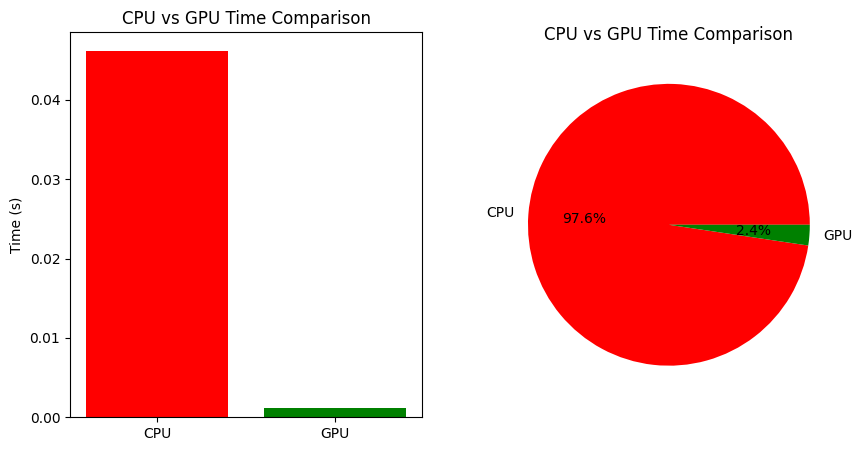

In [30]:
import numpy as np
import cupy as cp
import time

# Matrix size
matrix_size = 1000

# Create random matrices
matrix_a = np.random.rand(matrix_size, matrix_size).astype(np.float32)
matrix_b = np.random.rand(matrix_size, matrix_size).astype(np.float32)

# CPU matrix multiplication
start_time = time.time()
cpu_result = np.dot(matrix_a, matrix_b)
cpu_time = time.time() - start_time
print("CPU Time:", cpu_time)

# GPU matrix multiplication
matrix_a_gpu = cp.asarray(matrix_a)
matrix_b_gpu = cp.asarray(matrix_b)
start_time = time.time()
gpu_result = cp.dot(matrix_a_gpu, matrix_b_gpu)
cp.cuda.Device().synchronize()  # Wait for GPU computation to finish
gpu_time = time.time() - start_time
print("GPU Time:", gpu_time)

# Transfer GPU result back to CPU
gpu_result = cp.asnumpy(gpu_result)

# Compare results
error = np.sum(np.abs(cpu_result - gpu_result))
print("Error:", error)

#  Show how efficient GPU is over CPU
print("GPU is", cpu_time / gpu_time, "times faster than CPU.")


import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the bar chart in the first subplot
axs[0].bar(["CPU", "GPU"], [cpu_time, gpu_time], color=["red", "green"])
axs[0].set_ylabel("Time (s)")
axs[0].set_title("CPU vs GPU Time Comparison")

# Plot the pie chart in the second subplot
axs[1].pie([cpu_time, gpu_time], labels=["CPU", "GPU"], colors=["red", "green"], autopct="%1.1f%%")
axs[1].set_title("CPU vs GPU Time Comparison")

# Show the plot
plt.show()

